In [1]:
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import network
from playing import *
import mnist_loader as ml

In [3]:
# hyper parameters
eta = 3.0
# load the MNIST data set
training_data, validation_data, test_data = ml.load_data_wrapper()
# load the trained 300/100 lenet
#net = load_network([784, 300, 100, 10], "weights09.npy", "biases09.npy")
#net = load_network([784, 300, 100, 10], "currw2-4.npy", "currb2-4.npy")

In [4]:
net = play()

In [ ]:
net.SGD(training_data, 50, 10, 3.0, pruning = False, test_data = test_data)

In [5]:
print "Network accuracy on training data:"
test_network_on_training_data(net)
print "Network accuracy on test data:"
test_network(net)
print "Network accuracy on validation data:"
validate_network(net)

Network accuracy on training data:
0.99444
Network accuracy on test data:
0.9721
Network accuracy on validation data:
0.9718


In [56]:
print "Layer 0:"
counter = 0
for i in range(784):
    bla = (np.absolute(net.weights[0][:,i]) < 0.0001).sum()
    if bla == 300:
        print i
        counter+=1
print "Total no of deletable neurons:" , counter

print "Layer 1:"
delLayer1 = []
for i in range(300):
    bla = (np.absolute(net.weights[1][:,i]) < 0.0000001).sum()
    if bla == 100:
        print i
        delLayer1.append(i)
print "Total no of deletable neurons:" , len(delLayer1)

print "Layer 2:"
delLayer2 = []
for i in range(100):
    bla = (np.absolute(net.weights[2][:,i]) < 0.00000001).sum()
    if bla == 10:
        print i
        delLayer2.append(i)
print "Total no of deletable neurons:" , len(delLayer2)

Layer 0:
Total no of deletable neurons: 0
Layer 1:
48
216
Total no of deletable neurons: 2
Layer 2:
5
12
17
26
33
35
38
43
56
63
68
78
86
88
90
92
96
Total no of deletable neurons: 17


In [57]:
# delete weights from between layer 300-100
net.weights[0] = np.delete(net.weights[0], delLayer1, axis=0)
net.weights[1] = np.delete(net.weights[1], delLayer1, axis = 1)
net.biases[0] = np.delete(net.biases[0], delLayer1, axis = 0)
net.sizes = [784, 300 - len(delLayer1), 100, 10]

# delete weights from between layer 100-10
net.weights[1] = np.delete(net.weights[1], delLayer2, axis = 0)
net.weights[2] = np.delete(net.weights[2], delLayer2, axis = 1)
net.biases[1] = np.delete(net.biases[1], delLayer2, axis = 0)

net.sizes = [784, 300 - len(delLayer1), 100 - len(delLayer2), 10]
print net.weights[0].shape, net.weights[1].shape, net.weights[2].shape
print net.biases[0].shape, net.biases[1].shape, net.biases[2].shape
print net.sizes

(298, 784) (83, 298) (10, 83)
(298, 1) (83, 1) (10, 1)
[784, 298, 83, 10]


In [ ]:

print net.weights[2].shape, net.biases[1].shape

In [20]:
net.sizes = [784, 278, 59, 10]

In [33]:
net.weights[0] = np.delete(net.weights[0], delLayer1, axis=0)
net.weights[0].shape

(278, 784)

In [35]:
net.weights[1] = np.delete(net.weights[1], delLayer2, axis = 0)
net.weights[1].shape

(59, 278)

In [11]:
net.set_mask_threshold(2.1)
net.SGD(training_data, 5, 10, 3.0, test_data=test_data)
hist0 = plt.hist(net.weights[0].ravel(), bins=256, fc='k', ec='k')
print net.weights_under()
net.save("weights2-1", "biases2-1")

Before training: 9700 / 10000
Epoch 0: 9704 / 10000
Epoch 1: 9159 / 10000
Epoch 2: 9327 / 10000
Epoch 3: 9365 / 10000
Epoch 4: 9431 / 10000
0.967099924869


In [70]:
def plot_with_color_bar(toPlot):
    plt.figure()
    ax = plt.gca()
    im = ax.imshow(toPlot)

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)

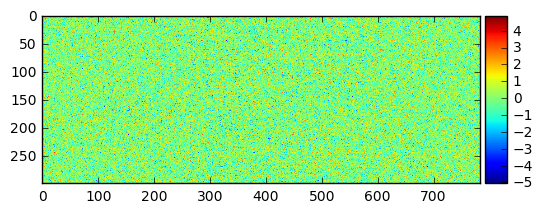

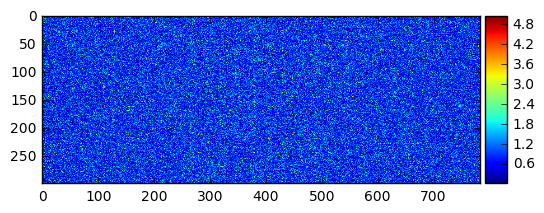

In [71]:
plot_with_color_bar(net.weights[0])
plot_with_color_bar(np.absolute(net.weights[0]))

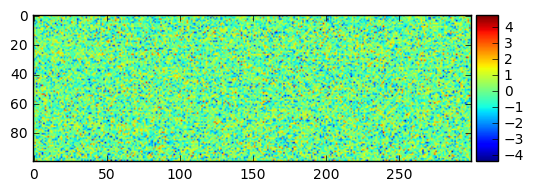

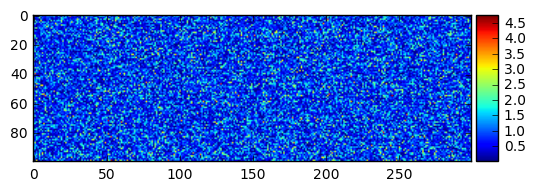

In [72]:
plot_with_color_bar(net.weights[1])
plot_with_color_bar(np.absolute(net.weights[1]))

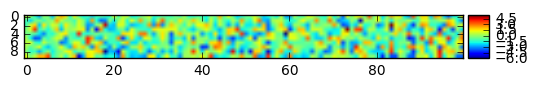

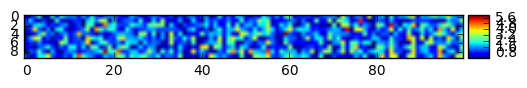

In [73]:
plot_with_color_bar(net.weights[2])
plot_with_color_bar(np.absolute(net.weights[2]))

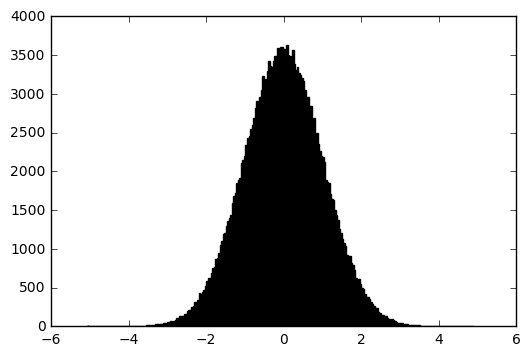

In [74]:
hist0 = plt.hist(net.weights[0].ravel(), bins=256, fc='k', ec='k')

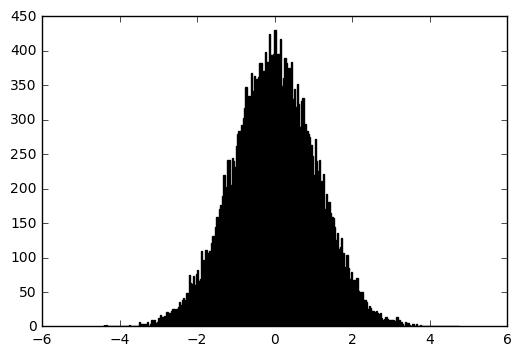

In [75]:
hist1 = plt.hist(net.weights[1].ravel(), bins=256, fc='k', ec='k')

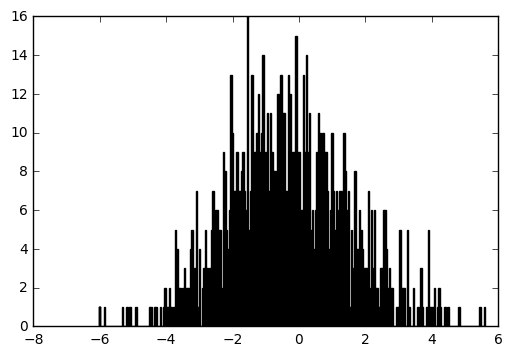

In [76]:
hist2 = plt.hist(net.weights[2].ravel(), bins=256, fc='k', ec='k')

In [77]:
print net.weights[0].max()
print net.weights[0].min()
print net.weights[0].mean()
print net.weights[1].max()
print net.weights[1].min()
print net.weights[1].mean()
print net.weights[2].max()
print net.weights[2].min()
print net.weights[2].mean()

4.88026647037
-5.05883005169
-0.0100634966571
4.74703210733
-4.40162441074
-0.0142707083576
5.60412501833
-6.01488875078
-0.308924337321


In [78]:
gradients = net.get_gradients(training_data, eta)

In [79]:
(grad_w, grad_b) = gradients

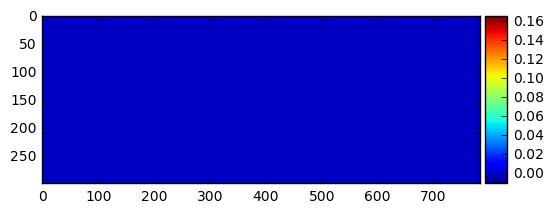

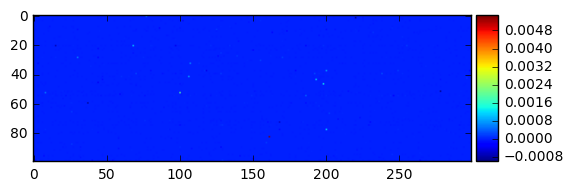

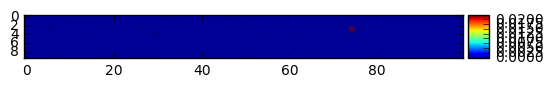

In [80]:
gw_ratio = [-g/w for g, w in zip(grad_w, net.weights)]
plot_with_color_bar(gw_ratio[0])
plot_with_color_bar(gw_ratio[1])
plot_with_color_bar(gw_ratio[2])

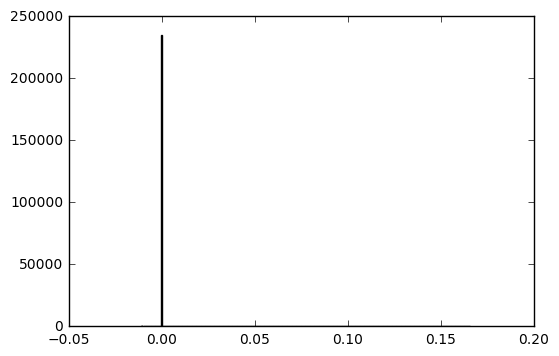

In [81]:
histgw0 = plt.hist(gw_ratio[0].ravel(), bins=256, fc='k', ec='k')

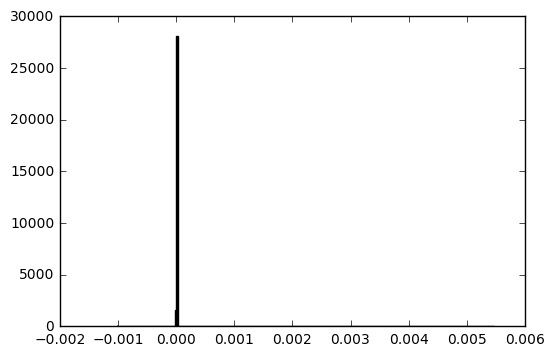

In [82]:
histgw1 = plt.hist(gw_ratio[1].ravel(), bins=256, fc='k', ec='k')

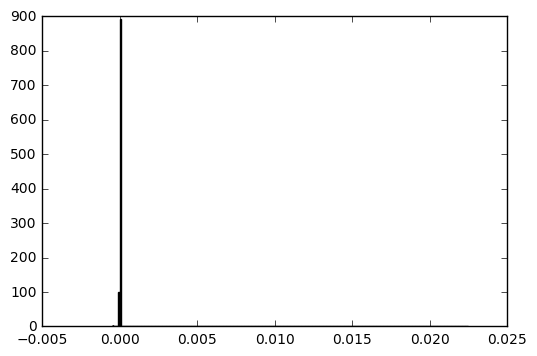

In [83]:
histgw2 = plt.hist(gw_ratio[2].ravel(), bins=256, fc='k', ec='k')

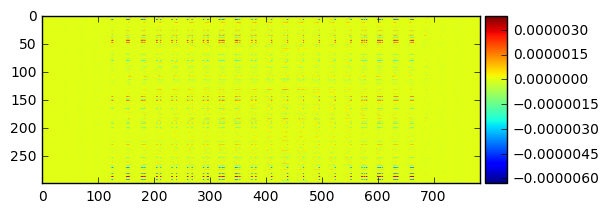

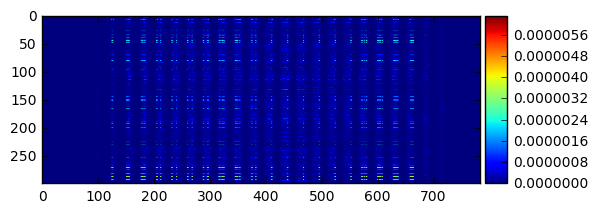

In [84]:
plot_with_color_bar(grad_w[0])
plot_with_color_bar(np.absolute(grad_w[0]))

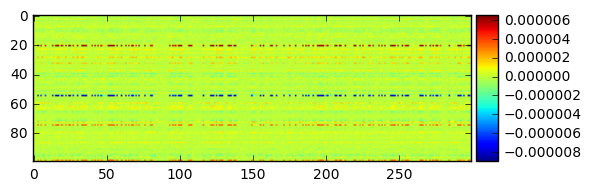

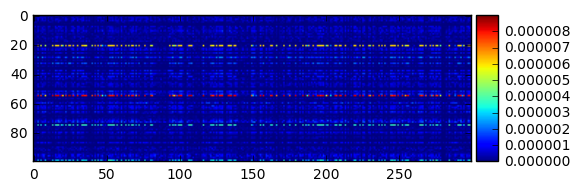

In [85]:
plot_with_color_bar(grad_w[1])
plot_with_color_bar(np.absolute(grad_w[1]))

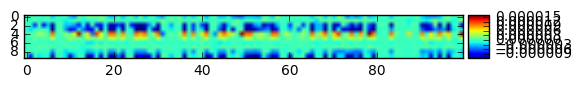

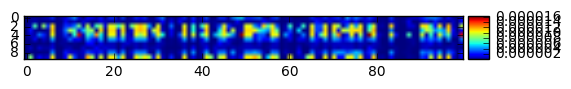

In [86]:
plot_with_color_bar(grad_w[2])
plot_with_color_bar(np.absolute(grad_w[2]))

In [87]:
(vgrad_w, vgrad_b) = net.get_gradients(validation_data, eta)

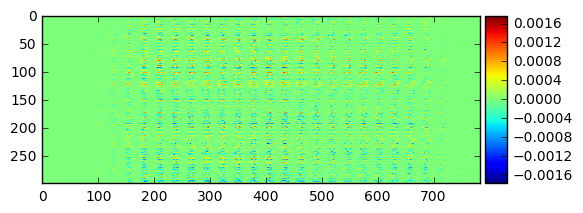

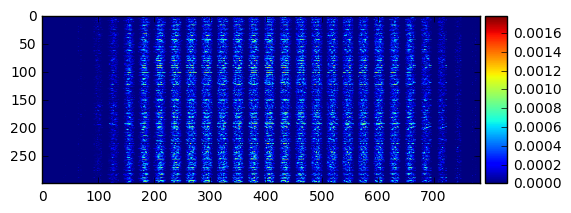

In [88]:
plot_with_color_bar(vgrad_w[0])
plot_with_color_bar(np.absolute(vgrad_w[0]))

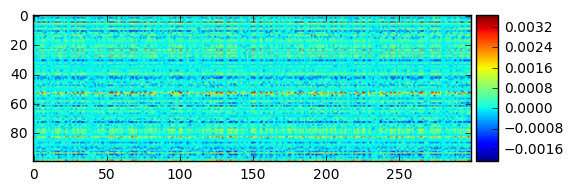

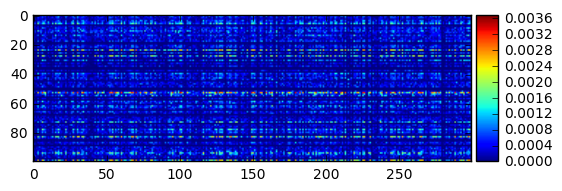

In [89]:
plot_with_color_bar(vgrad_w[1])
plot_with_color_bar(np.absolute(vgrad_w[1]))

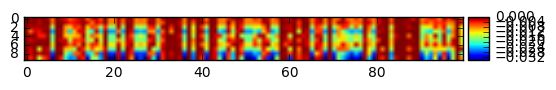

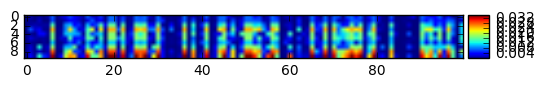

In [90]:
plot_with_color_bar(vgrad_w[2])
plot_with_color_bar(np.absolute(vgrad_w[2]))

In [91]:
(tgrad_w, tgrad_b) = net.get_gradients(test_data, eta)

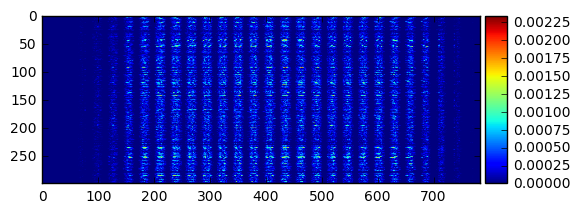

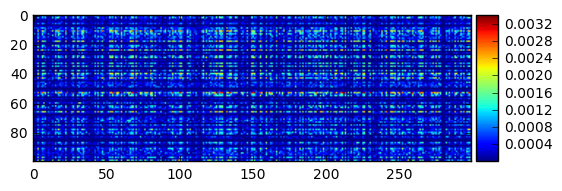

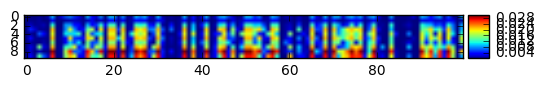

In [92]:
plot_with_color_bar(np.absolute(tgrad_w[0]))
plot_with_color_bar(np.absolute(tgrad_w[1]))
plot_with_color_bar(np.absolute(tgrad_w[2]))

In [114]:
netMini = network.Network([784, 30, 10])
grad_weights= netMini.SGD(training_data, 3, 10, 3.0)

Epoch 0 complete
Epoch 1 complete
Epoch 2 complete


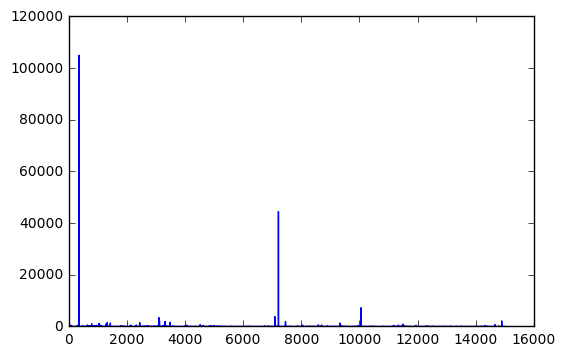

In [115]:
layer0_norm = []
layer1_norm = []

for (g, w) in grad_weights:
    layer0_norm.append(np.linalg.norm([a/b for a,b in zip(g[0],w[0])]))
    layer1_norm.append(np.linalg.norm([a/b for a,b in zip(g[1],w[1])]))
    
plt.plot(np.arange(0, len(layer1_norm)), layer1_norm)
plt.show()

(5000, 2)
(5000, 2)


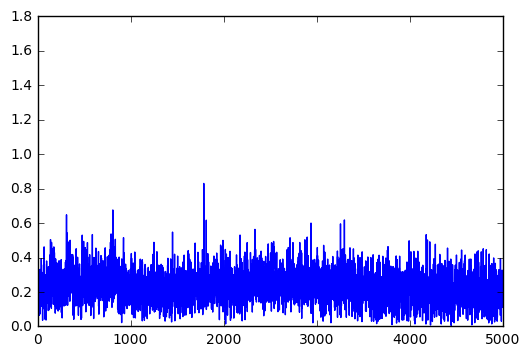

In [95]:
grads = [gw[0] for gw in grad_weights]
weights = [gw[1] for gw in grad_weights]
print np.shape(grads)
print np.shape(weights)

grad_norm0 = [np.linalg.norm(g[0]) for g in grads]
grad_norm1 = [np.linalg.norm(g[1]) for g in grads]

plt.plot(np.arange(0, len(grad_norm1)), grad_norm1)
plt.show()

In [96]:
grad_norm0 = [np.linalg.norm(g[0]) for g in grads]
grad_norm1 = [np.linalg.norm(g[1]) for g in grads]

In [97]:
l = np.arange(0, len(grad_norm0), 1)
print len(grads)

5000


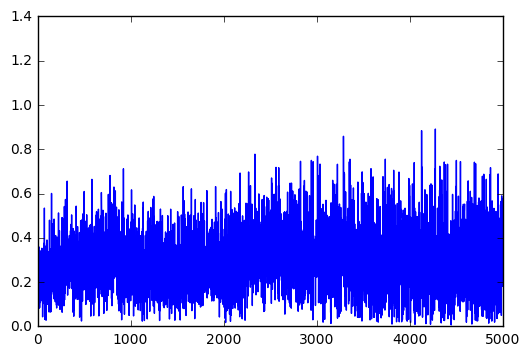

In [98]:
plt.plot(np.arange(0, len(grad_norm0)), grad_norm0)
plt.show()


In [99]:
test_network_on_training_data(netMini)

0.8987


In [100]:
(mgrad_w, mgrad_b) = netMini.get_gradients(training_data, eta)

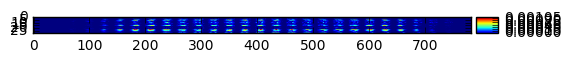

In [101]:
plot_with_color_bar(np.absolute(mgrad_w[0]))

In [102]:
print mgrad_w[0].min()
print mgrad_w[0].max()

-0.0011230200879
0.00113974134152


(2,)
2.27795395917
0.320807457133


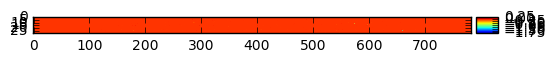

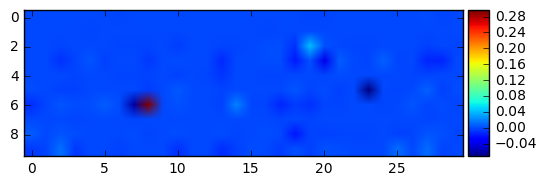

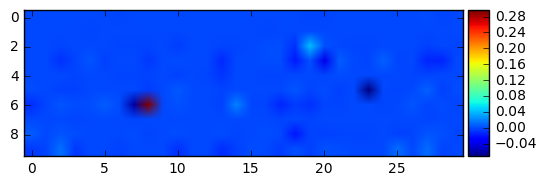

In [113]:
print np.shape(mgrad_w)
g = mgrad_w
w = netMini.weights
lay0 = [a/b for a,b in zip(g[0],w[0])]
lay1 = [a/b for a,b in zip(g[1],w[1])]
print np.linalg.norm([a/b for a,b in zip(g[0],w[0])])
print np.linalg.norm([a/b for a,b in zip(g[1],w[1])])
gw_ratio_mini = [g/w for g, w in zip(mgrad_w, netMini.weights)]
plot_with_color_bar(gw_ratio_mini[0])
plot_with_color_bar(gw_ratio_mini[1])
plot_with_color_bar(lay1)

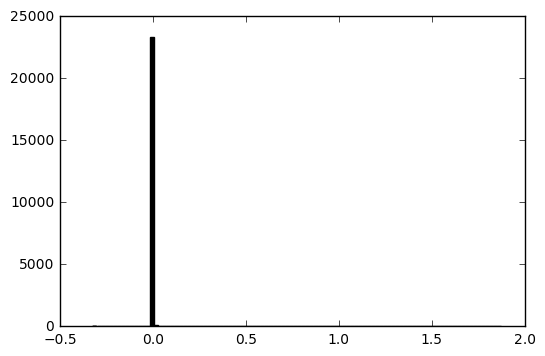

In [104]:
histgwm0 = plt.hist(gw_ratio_mini[0].ravel(), bins=100, fc='k', ec='k')

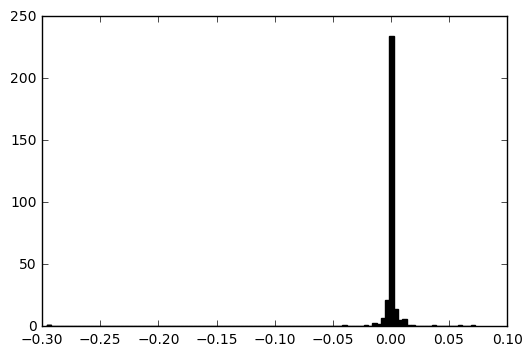

In [105]:
histgwm1 = plt.hist(gw_ratio_mini[1].ravel(), bins=100, fc='k', ec='k')

In [106]:
print np.linalg.norm(gw_ratio_mini[0])
print np.linalg.norm(gw_ratio_mini[1])

2.27795395917
0.320807457133


In [107]:
np.copy(gw_ratio_mini)

array([ array([[ 0.,  0., -0., ...,  0., -0.,  0.],
       [-0.,  0., -0., ..., -0.,  0., -0.],
       [ 0.,  0., -0., ..., -0.,  0., -0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0., -0.],
       [ 0.,  0.,  0., ...,  0., -0.,  0.],
       [ 0.,  0.,  0., ...,  0., -0., -0.]]),
       array([[ -8.29736161e-05,   5.41356862e-05,   2.58860285e-04,
         -3.89475179e-04,  -6.17378441e-04,  -5.86623046e-05,
          1.32519410e-03,  -1.98835962e-04,  -3.18557332e-04,
          2.92107639e-04,  -3.22567891e-04,   6.24212100e-05,
         -4.99107896e-04,   3.06498657e-05,  -9.72220252e-04,
         -3.05118384e-04,  -1.94247294e-04,  -3.55987888e-05,
          2.28487709e-04,   1.08991820e-03,   8.86503306e-04,
          3.32812424e-04,   1.03435476e-04,  -6.40265139e-05,
         -7.79776255e-05,   1.11177258e-04,  -4.06356376e-06,
         -1.03402129e-03,   9.92523727e-04,  -1.12461935e-04],
       [ -9.97158221e-05,  -3.46041057e-04,   1.96801487e-05,
         -1.86614304e-0